In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# DATA SET- CARAVAN POLICY

In [2]:
data = pd.read_csv('Caravan.csv')
data.shape # 5822 observations, 87 columns

(5822, 87)

In [3]:
len(data.columns)# 87 predictors and one target

87

In [4]:
# Descriptive stats
data.describe()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,2911.500000,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,1680.810965,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1456.250000,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2911.500000,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4366.750000,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5822.000000,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5822 non-null   int64 
 1   MOSTYPE     5822 non-null   int64 
 2   MAANTHUI    5822 non-null   int64 
 3   MGEMOMV     5822 non-null   int64 
 4   MGEMLEEF    5822 non-null   int64 
 5   MOSHOOFD    5822 non-null   int64 
 6   MGODRK      5822 non-null   int64 
 7   MGODPR      5822 non-null   int64 
 8   MGODOV      5822 non-null   int64 
 9   MGODGE      5822 non-null   int64 
 10  MRELGE      5822 non-null   int64 
 11  MRELSA      5822 non-null   int64 
 12  MRELOV      5822 non-null   int64 
 13  MFALLEEN    5822 non-null   int64 
 14  MFGEKIND    5822 non-null   int64 
 15  MFWEKIND    5822 non-null   int64 
 16  MOPLHOOG    5822 non-null   int64 
 17  MOPLMIDD    5822 non-null   int64 
 18  MOPLLAAG    5822 non-null   int64 
 19  MBERHOOG    5822 non-null   int64 
 20  MBERZELF

In [6]:
data.replace({'Yes':1,'No':0},inplace=True)  # TO CONVERT YES NO TO 1 0

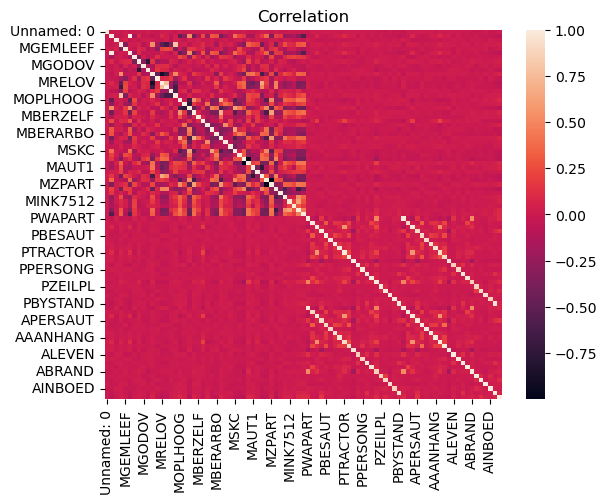

In [8]:
data_corr = data.corr()

#heatmap for checking correlation between columns
sn.heatmap(data_corr)
plt.title('Correlation')
plt.show()

In [9]:
# Removing of columns with correlation >= 0.9

t=0.9 
columns=np.full((data_corr.shape[0],), True, dtype=bool)
for i in range(data_corr.shape[0]):
    for j in range(i+1, data_corr.shape[0]):
        if data_corr.iloc[i,j] >= t:
            if columns[j]:
                columns[j] = False

selected_columns = data.columns[columns]
Modified_Data = data[selected_columns]

In [10]:
Modified_Data.shape # columns have been reduced to 71 from 87

(5822, 71)

In [11]:
X=Modified_Data.iloc[:,1:-1].values
Y=Modified_Data.iloc[:,-1].values

# TRAIN TEST SPLITTING OF THE DATA

from sklearn.model_selection import train_test_split
xtrain,xtest,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# FEATURE SCALING

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train=scaler.fit_transform(xtrain)
x_test=scaler.transform(xtest)
len(xtest),len(xtrain)

(1747, 4075)

# LOGISTIC REGRESSION ANALYSIS ON CARAVAN POLICY DATASET

In [12]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

accuracy of LOGISTIC REGRESSION MODEL=  0.9398969662278192


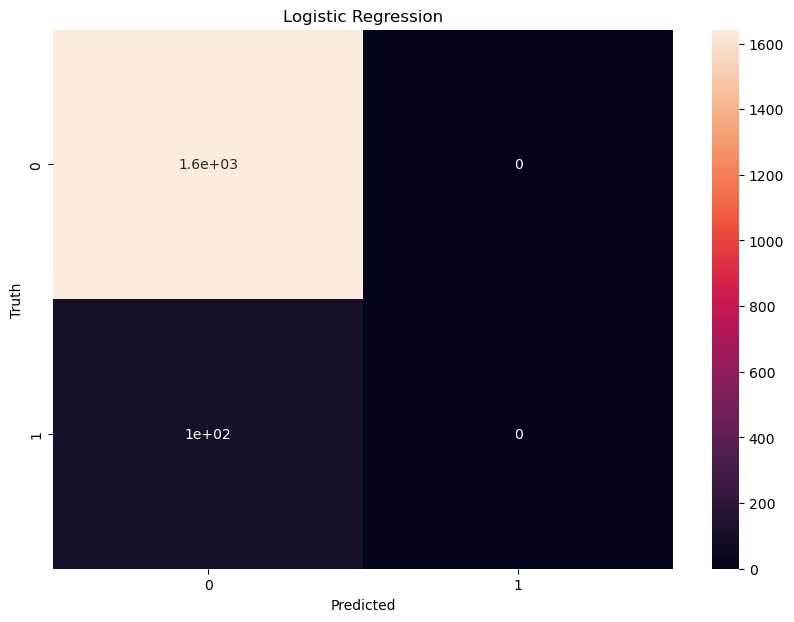

In [13]:
ypredict1=model_LR.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypredict1)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression')
print("accuracy of LOGISTIC REGRESSION MODEL= ",accuracy_score(y_test,ypredict1))

# LDA REGRESSION ANALYSIS ON CARAVAN POLICY DATASET

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA=LinearDiscriminantAnalysis()
model_LDA.fit(x_train,y_train)

LinearDiscriminantAnalysis()

accuracy of LDA MODEL=  0.9341728677733258


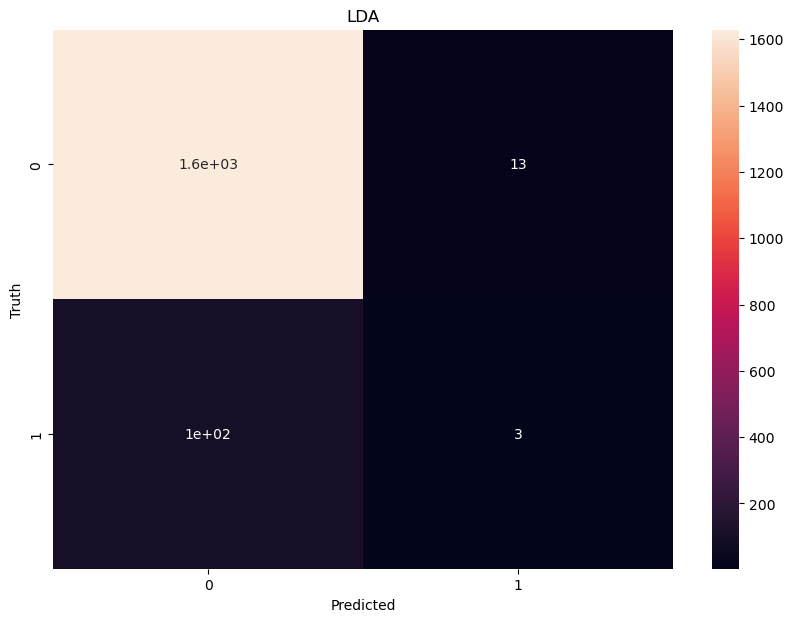

In [15]:
ypredict2=model_LDA.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypredict2)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('LDA')
print("accuracy of LDA MODEL= ",accuracy_score(y_test,ypredict2))

In [16]:
# CALCULATIONS FOR ROC AND AUC FOR BOTH THE MODELS:
yprob1 = model_LR.predict_proba(x_test)
yprob2 = model_LDA.predict_proba(x_test)

def plot_roc_curve(true_y, y_prob, colour, Label):
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob[:,1],pos_label=1)
    
    plt.plot(fpr, tpr, linestyle='--',color=colour, label=Label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 

 LOGISTIC_REGRESSION AUC score: 0.7345745606403341


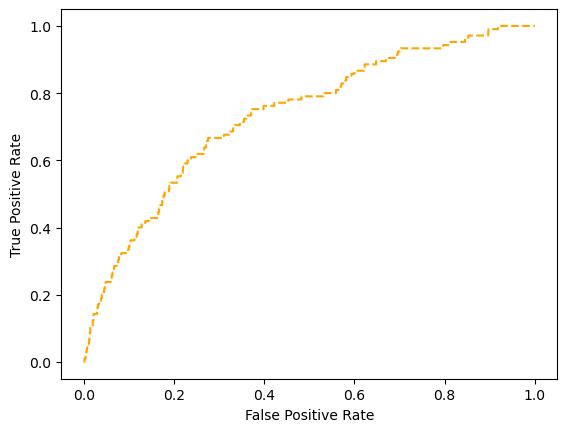

In [17]:
plot_roc_curve(y_test,yprob1,'orange','LOGISTIC REGRESSION')
print(f' LOGISTIC_REGRESSION AUC score: {roc_auc_score(y_test, yprob1[:,1])}')

 LDA AUC score: 0.7417435183574038


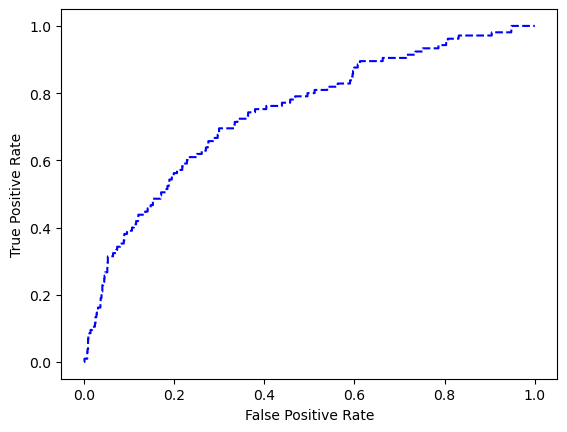

In [18]:
plot_roc_curve(y_test,yprob2,'blue','LDA')
print(f' LDA AUC score: {roc_auc_score(y_test, yprob2[:,1])}')

# DATASET -BANKRUPTCY ANALYSIS

In [19]:
data = pd.read_csv('Bankruptcy.csv')
data.shape # 6819 observations, 96 columns

(6819, 96)

In [20]:
len(data.columns)# 95 predictors and one target

96

In [21]:
# Descriptive stats
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

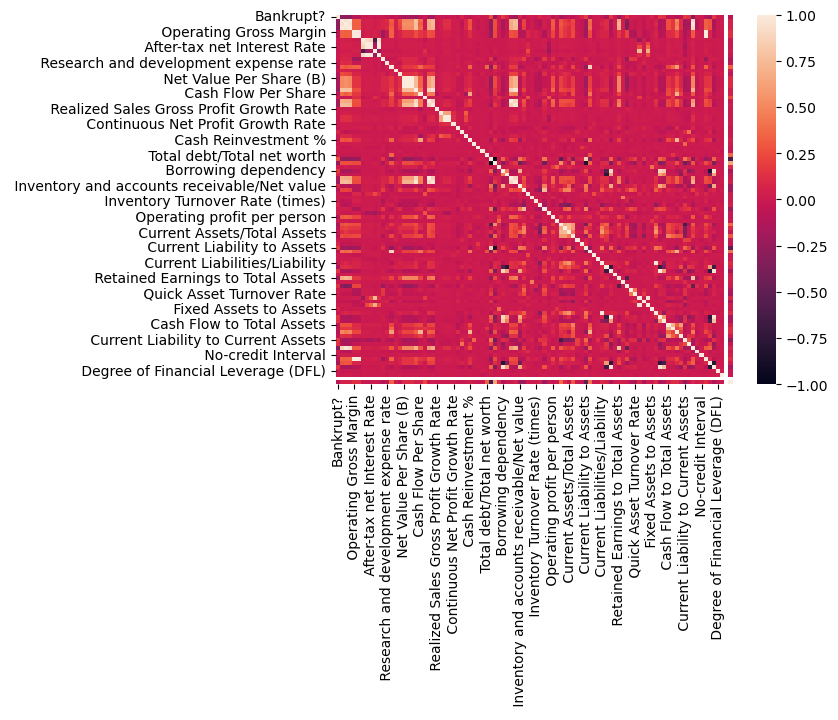

In [23]:
data_corr = data.corr()
sn.heatmap(data_corr)  #heatmap for checking correlation between columns
plt.show()

In [24]:
# Removing of columns with correlation >= 0.9

t=0.9 
columns=np.full((data_corr.shape[0],), True, dtype=bool)
for i in range(data_corr.shape[0]):
    for j in range(i+1, data_corr.shape[0]):
        if data_corr.iloc[i,j] >= t:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
Modified_Data = data[selected_columns]

In [25]:
Modified_Data.shape # columns have been reduced to 78 from 96

(6819, 78)

In [26]:
X=Modified_Data.iloc[:,1:].values
Y=Modified_Data.iloc[:,0].values

# TRAIN TEST SPLITTING OF THE DATA

from sklearn.model_selection import train_test_split
xtrain,xtest,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# FEATURE SCALING

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train=scaler.fit_transform(xtrain)
x_test=scaler.transform(xtest)
len(xtest),len(xtrain)

(2046, 4773)

# LOGISTIC REGRESSION ANALYSIS FOR BANKRUPTCY DATASET

In [27]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression(max_iter=300,random_state=42)
model_LR.fit(x_train,y_train)

LogisticRegression(max_iter=300, random_state=42)

Text(0.5, 1.0, 'Logistic Regression')

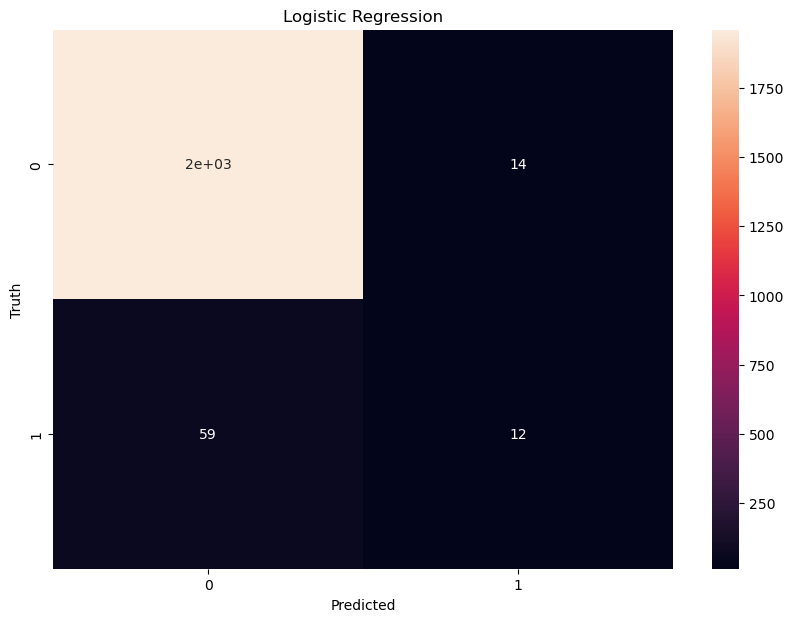

In [28]:
ypredict1=model_LR.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypredict1)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression')

# KNN CLASSIFIER ANALYSIS FOR BANKRUPTCY DATASET

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
mx_i=-1
mx_accuracy_score=-1
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_pred=neigh.predict(x_test)
    temp=accuracy_score(y_test, y_pred)
    print(temp)
    if(temp>mx_accuracy_score):
        mx_i=i
        mx_accuracy_score=temp
mx_i,mx_accuracy_score # n for which KNN gives max accuracy score

0.9530791788856305
0.967741935483871
0.9638318670576735
0.9667644183773216
0.966275659824047
0.966275659824047
0.9672531769305963
0.9657869012707723
0.9657869012707723
0.9667644183773216
0.9667644183773216
0.9667644183773216
0.967741935483871
0.966275659824047
0.966275659824047
0.9657869012707723
0.966275659824047
0.9652981427174976
0.9652981427174976


(2, 0.967741935483871)

Text(0.5, 1.0, 'KNN')

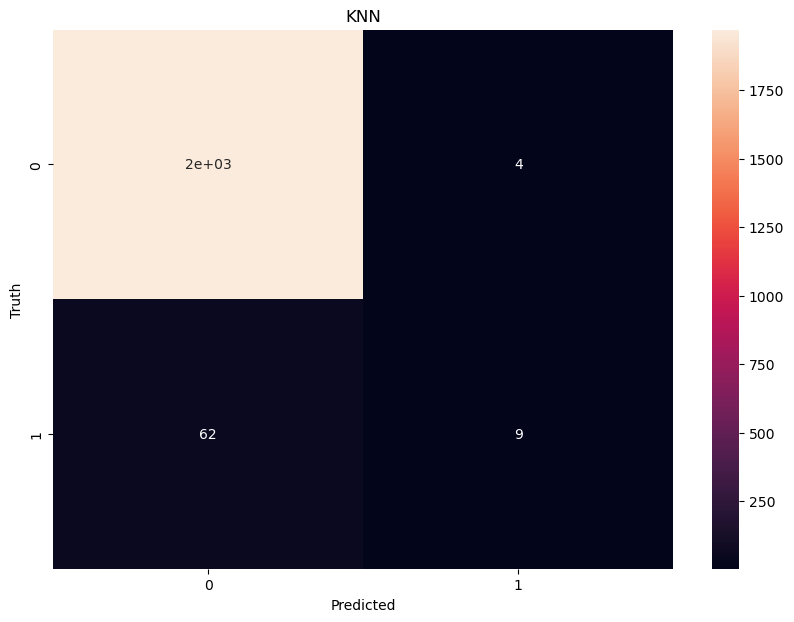

In [31]:
model_KNN=KNeighborsClassifier(n_neighbors=mx_i)
model_KNN.fit(x_train,y_train)
ypredict2=model_KNN.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypredict2)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('KNN')

# DECISION TREE CLASSIFIER ANALYSIS ON BANKRUPTCY DATASET 

In [32]:
from sklearn import tree
mx_j=-1
mx_accuracy_score_DT=-1
for i in (500,250,375):
    model=tree.DecisionTreeClassifier(criterion = 'entropy',min_samples_split=i)
    model.fit(x_train,y_train)
    y_pred=neigh.predict(x_test)
    temp=accuracy_score(y_test, y_pred)
    print(temp)
    if(temp>mx_accuracy_score_DT):
        mx_j=i
        mx_accuracy_score_DT=temp
mx_j,mx_accuracy_score_DT # mx_j is min sample split for which DT gives max accuracy score

0.9652981427174976
0.9652981427174976
0.9652981427174976


(500, 0.9652981427174976)

Text(0.5, 1.0, 'Decision Tree')

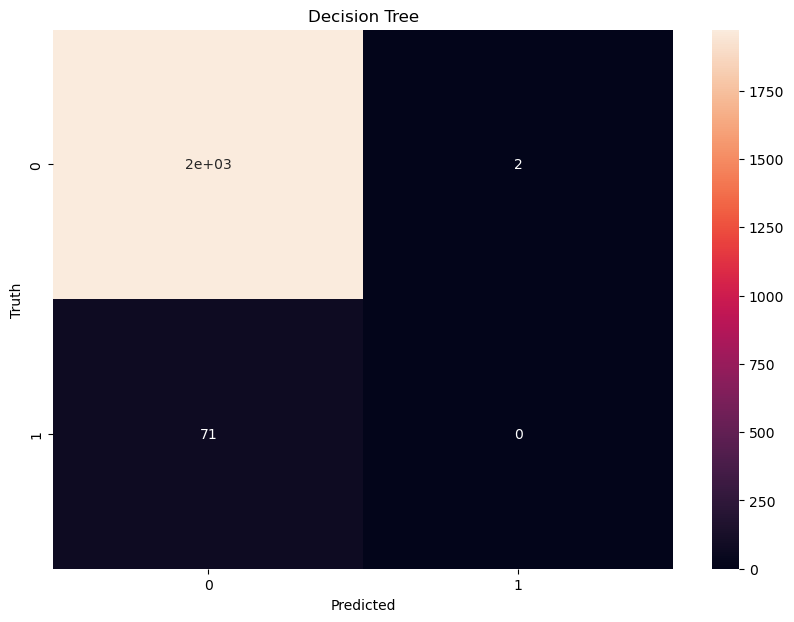

In [33]:
from sklearn import tree
model_Decision_Tree=tree.DecisionTreeClassifier(criterion = 'entropy',min_samples_split=mx_j)
model_Decision_Tree.fit(x_train,y_train)
ypredict3=model_Decision_Tree.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypredict3)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree')

In [34]:
# CALCULATION FOR ROC AND AUC OF ALL THE MODELS FOR BANKRUPTCY ANALYSIS
yprob1 = model_LR.predict_proba(x_test)
yprob2 = model_KNN.predict_proba(x_test)
yprob3 = model_Decision_Tree.predict_proba(x_test)
def plot_roc_curve(true_y, y_prob, colour, Label):
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob[:,1],pos_label=1)
    
    plt.plot(fpr, tpr, linestyle='--',color=colour, label=Label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

 LOGISTIC_REGRESSION AUC score: 0.8999679087181315


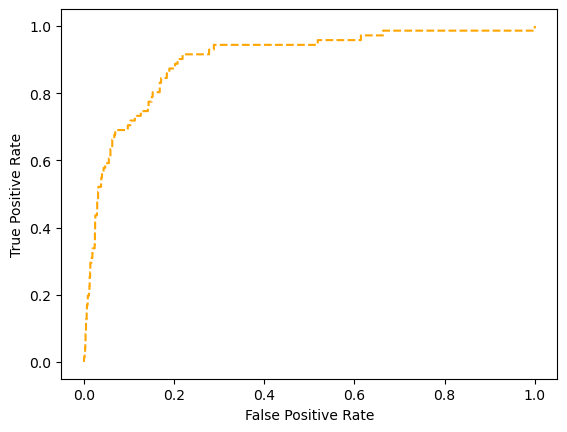

In [35]:
plot_roc_curve(y_test,yprob1,'orange','LOGISTIC REGRESSION')
print(f' LOGISTIC_REGRESSION AUC score: {roc_auc_score(y_test, yprob1[:,1])}')

 KNN AUC score: 0.6632733107505795


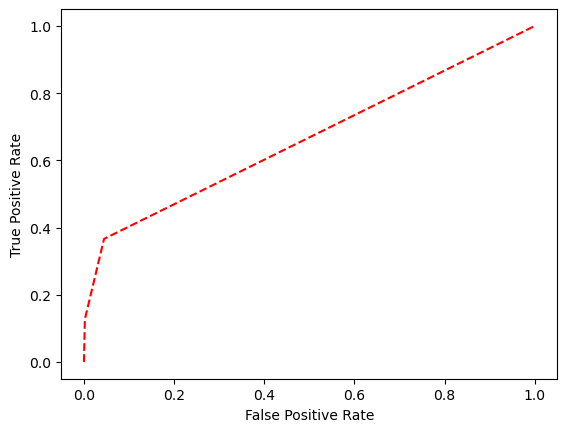

In [36]:
plot_roc_curve(y_test,yprob2,'red','KNN')
print(f' KNN AUC score: {roc_auc_score(y_test, yprob2[:,1])}')

 Decision Tree AUC score: 0.8787662684970584


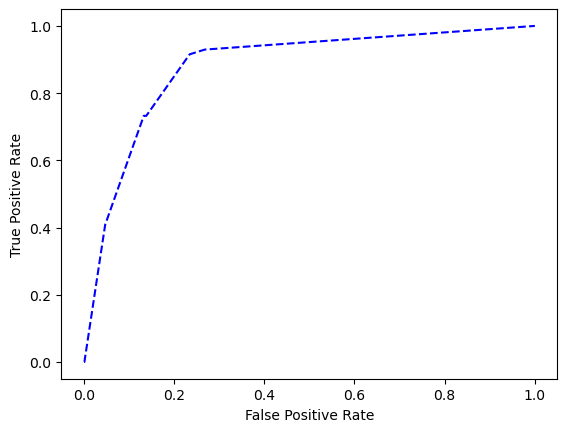

In [38]:
plot_roc_curve(y_test,yprob3,'blue','Decision Tree')
print(f' Decision Tree AUC score: {roc_auc_score(y_test, yprob3[:,1])}')

# DATASET- ADVERTISEMENT ANALYSIS

In [39]:
data=pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [41]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


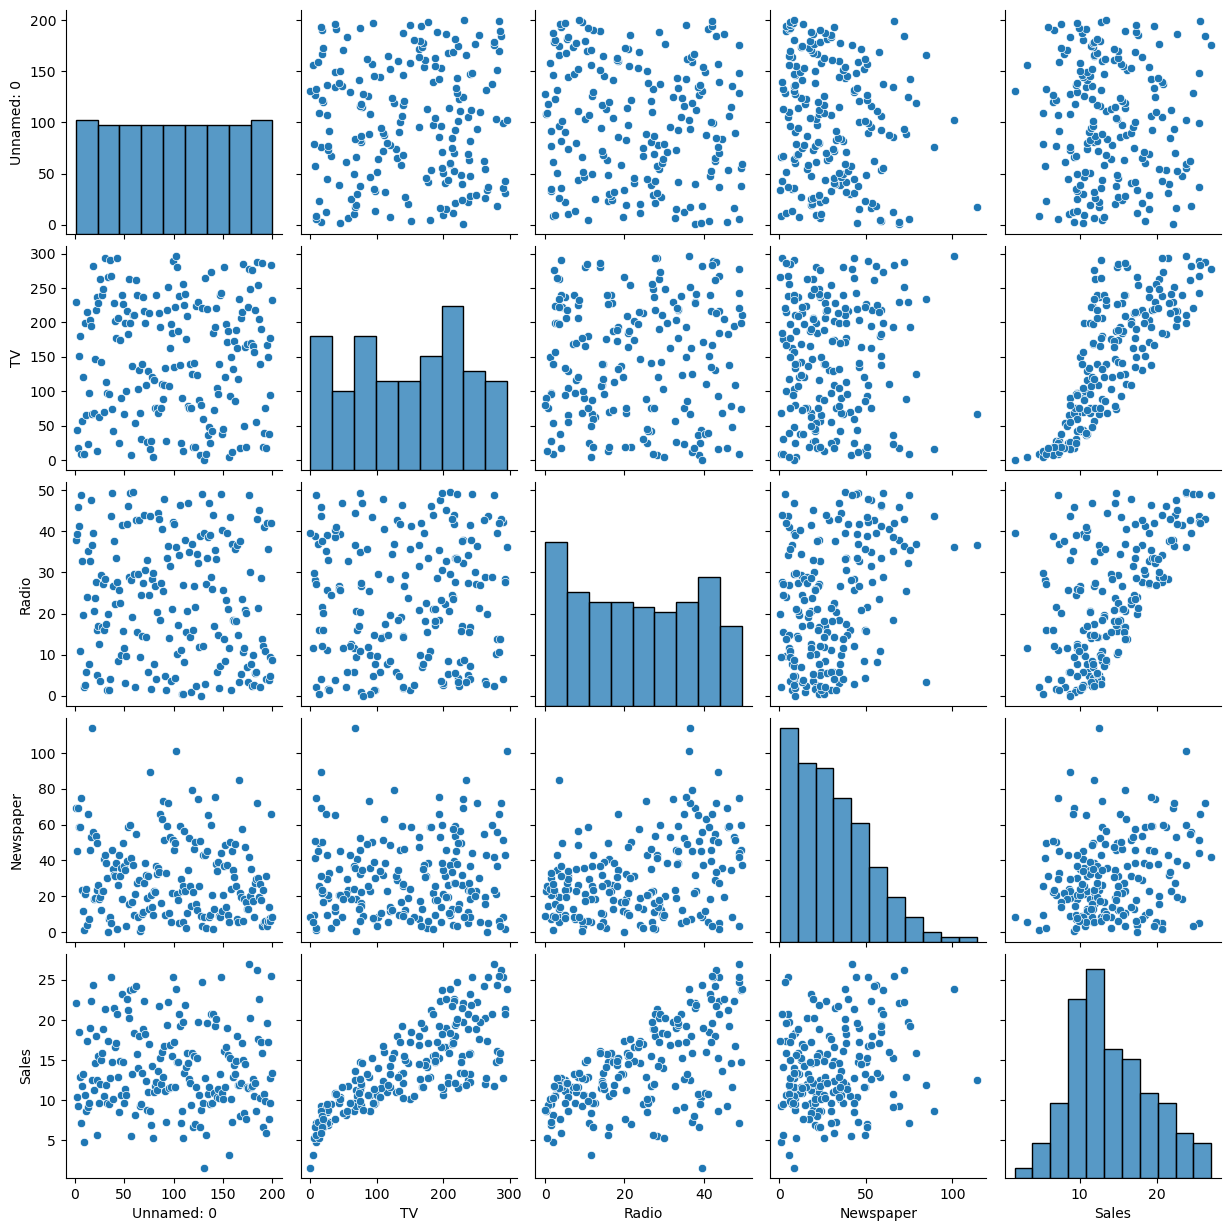

In [42]:
sn.pairplot(data);

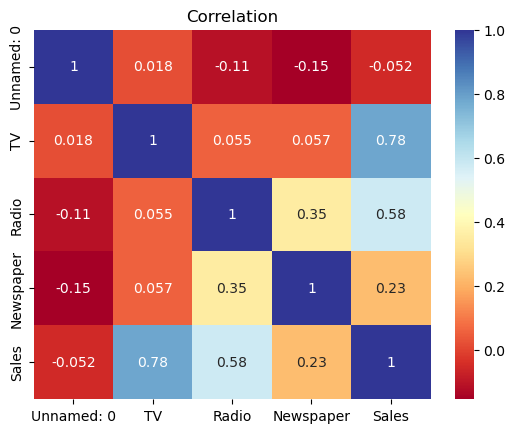

In [43]:
sn.heatmap(data.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [44]:
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values

# TRAIN TEST SPLITTING OF THE DATA

from sklearn.model_selection import train_test_split
xtrain,xtest,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

# FEATURE SCALING

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(xtrain)
x_test=scaler.transform(xtest)
len(xtest),len(xtrain)

(60, 140)

# MULTIPLE REGRESSION ANALYSIS FOR ADVERTISEMENT DATASET

In [46]:
# multiple linear regression
from sklearn import linear_model
from sklearn.metrics import classification_report

model_MLR=linear_model.LinearRegression()
model_MLR.fit(x_train,y_train)
y_pred1=model_MLR.predict(x_test)

print(" MLR MODEL")
print('R^2: ', r2_score(y_test, y_pred1))
print('MAE: ',mean_absolute_error(y_test, y_pred1))
print('MSE: ', mean_squared_error(y_test, y_pred1))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred1)))

 MLR MODEL
R^2:  0.8609466508230367
MAE:  1.5116692224549084
MSE:  3.7967972367152214
RMSE:  1.948537204344639


# RIDGE REGRESSION ANALYSIS FOR ADVERTISEMENT DATASET

In [47]:
# Ridge Regression
from sklearn.linear_model import Ridge

model_Ridge=Ridge(alpha=1.0)
model_Ridge.fit(x_train,y_train)
model_Ridge.score(x_test,y_test)
y_pred2=model_Ridge.predict(x_test)

print(" Ridge MODEL")
print('R^2: ', r2_score(y_test, y_pred2))
print('MAE: ',mean_absolute_error(y_test, y_pred2))
print('MSE: ', mean_squared_error(y_test, y_pred2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred2)))

 Ridge MODEL
R^2:  0.8608226691408616
MAE:  1.5102023873757657
MSE:  3.8001825079875218
RMSE:  1.949405680710796


# LASSO REGRESSION ANALYSIS FOR ADVERTISEMENT DATASET

In [48]:
# Lasso Regression
from sklearn.linear_model import Lasso

model_Lasso=Lasso(alpha=1.0)
model_Lasso.fit(x_train,y_train)
model_Lasso.score(x_test,y_test)
y_pred3=model_Ridge.predict(x_test)

print(" Lasso MODEL")
print('R^2: ', r2_score(y_test, y_pred3))
print('MAE: ',mean_absolute_error(y_test, y_pred3))
print('MSE: ', mean_squared_error(y_test, y_pred3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred3)))

 Lasso MODEL
R^2:  0.8608226691408616
MAE:  1.5102023873757657
MSE:  3.8001825079875218
RMSE:  1.949405680710796


# IMAGE COMPRESSION THROUGH SVD

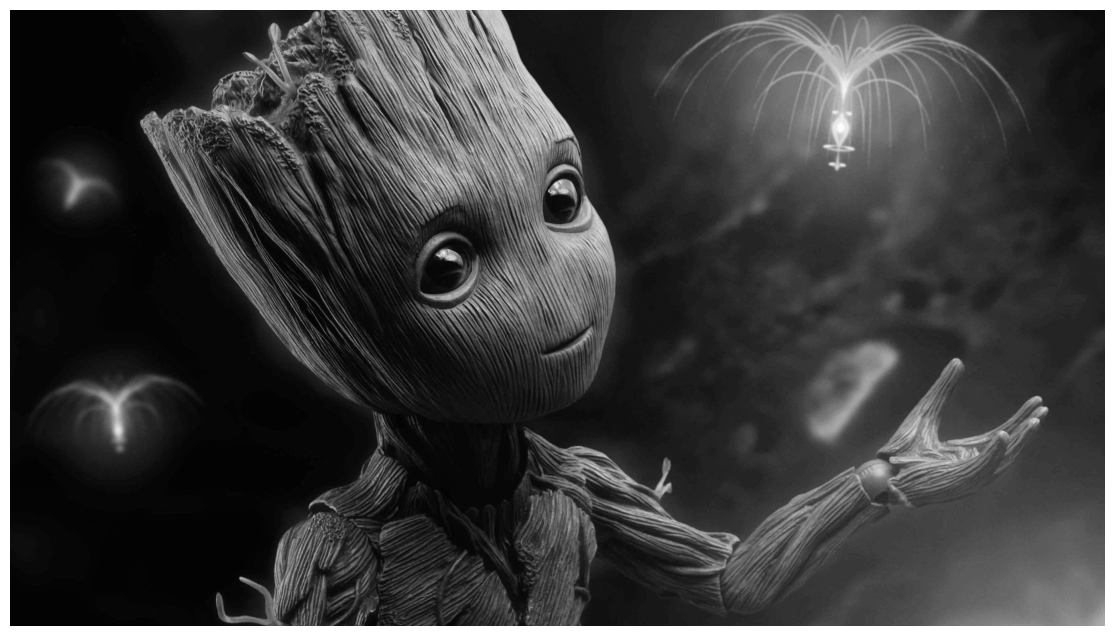

Bildgröße: (2425, 4310)


In [49]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.linalg as ln
import numpy as np
import os
from PIL import Image
from math import log10, sqrt 
plt.rcParams['figure.figsize'] = [16, 8]
# Import image
A = imread("Image 1.jpg")
X = A.dot([0.299, 0.5870, 0.114]) # Convert RGB to grayscale
img = plt.imshow(X)
# Konvert to gray
img.set_cmap('gray')
plt.axis('off')
plt.show()
# Call image size
print('Bildgröße: %s'%str(X.shape))

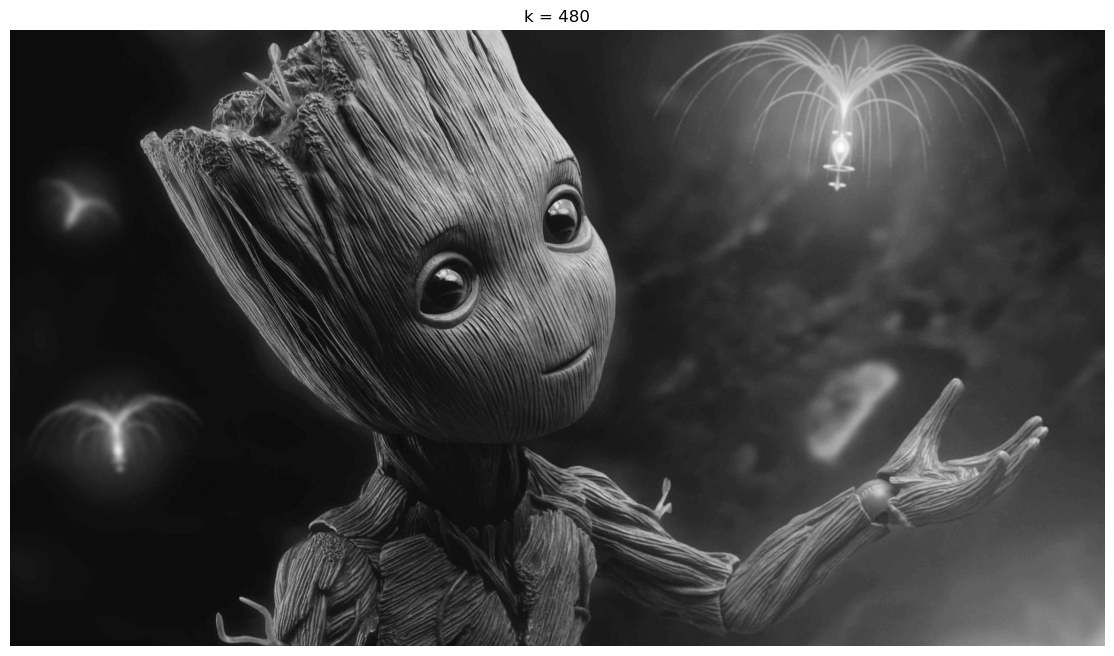

Originalgröße:
10451750
komprimierte Größe / Originalgröße:
0.30935297916616833
Compression rate is 30.94%
Die Mittlere quadratische Abweichung beträgt 3
Signal-Rausch-Verhältnis beträgt 44dB


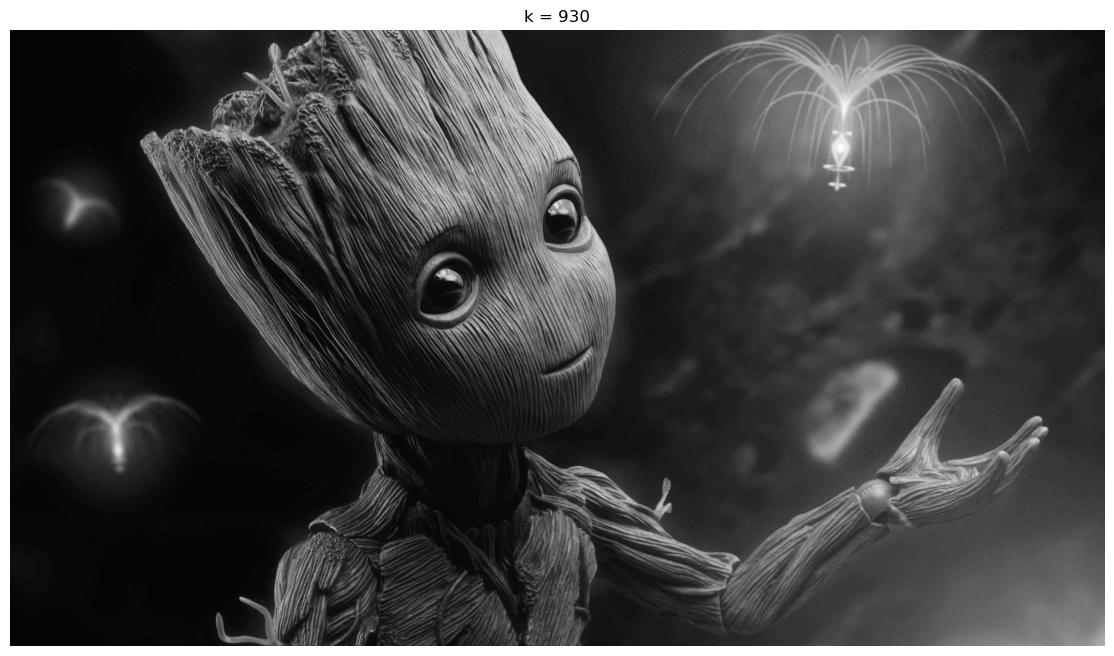

Originalgröße:
10451750
komprimierte Größe / Originalgröße:
0.5993713971344512
Compression rate is 59.94%
Die Mittlere quadratische Abweichung beträgt 0
Signal-Rausch-Verhältnis beträgt 57dB


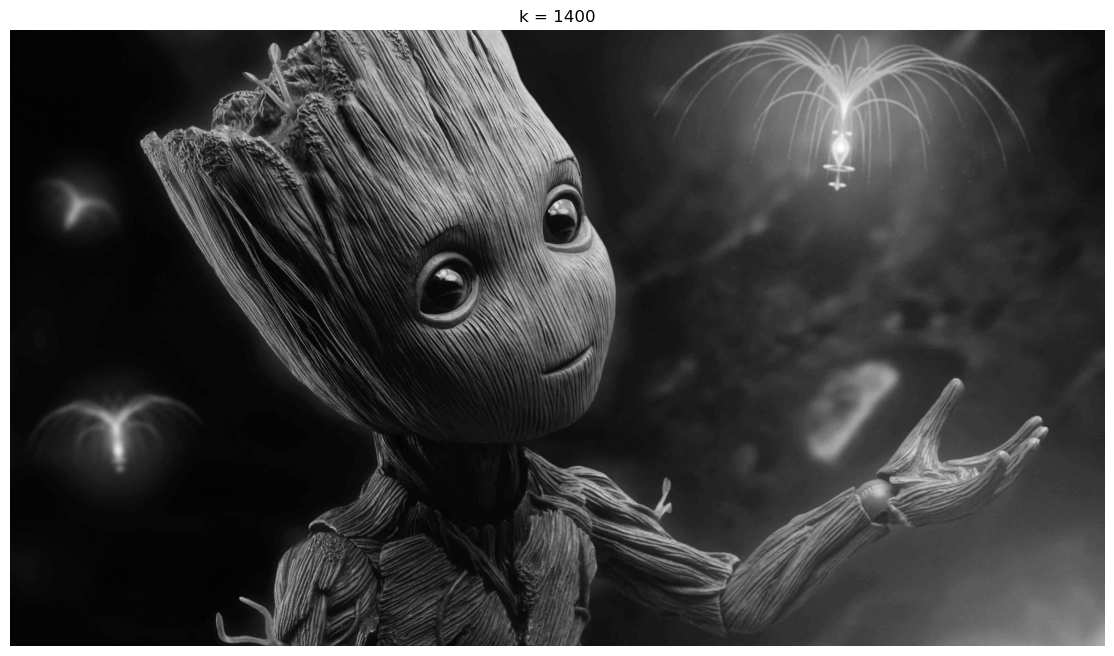

Originalgröße:
10451750
komprimierte Größe / Originalgröße:
0.902279522567991
Compression rate is 90.23%
Die Mittlere quadratische Abweichung beträgt 0
Signal-Rausch-Verhältnis beträgt 67dB


In [50]:
# split the matrix into U, S, VT
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
m = 4310 # Image's width
n = 2425 # Image's height
j = 0
# Try compression with different k:
for k in (480,930,1400):
    # Original size of the image
    originalSize = m * n 
    # Size after compressed
    compressedSize = k * (1 + m + n) 
    # Aüürpximation of A
    Xapprox = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    
    plt.axis('off')
    plt.title('k = ' + str(k))
    plt.show() 
    print('Originalgröße:')
    print(originalSize)
    print('komprimierte Größe / Originalgröße:')
    # Estimate the compression rate
    ratio = compressedSize * 1.0 / originalSize
    print(ratio)
    print('Compression rate is ' + str( round(ratio * 100 ,2)) + '%' )  
    # Estimate MQA
    x= X.astype("float")
    y=Xapprox.astype("float")
    err = np.sum((x - y) ** 2)
    err /= float(X.shape[0] * Xapprox.shape[1])
    print('Die Mittlere quadratische Abweichung beträgt '+ str(round( err)))
    max_pixel = 255.0
    # Estimate Signal Noise Ratio
    srv = 20 * (log10(max_pixel / sqrt(err)))
    print('Signal-Rausch-Verhältnis beträgt '+ str(round(srv)) +'dB')